# 회귀

: <span style='background-color: #ffdce0'>**최적의 회귀 계수**</span>(Regression coefficients)를 찾아내는 것  
  
통계학 용어를 빌리자면, "여러 개의 독립변수(피처)와 한 개의 종속변수(결정값) 간의 상관관계를 모델링하는 기법"을 통칭함  
  
|      |분류|회귀|
|------|----|----|
|예측값|카테고리와 같은 이산형 클래스|연속된 숫자형|


> 표 왼쪽 정렬하기

In [10]:
%%html
<style>
table {float:left}
</style>

## 유형

회귀 계수가 선형이냐? 아니냐? 에 따라 => 선형/비선형 회귀로 나뉨  
독립 변수가 한 개냐? 여러 개냐? 에 따라 => 단일/다중 회귀로 나뉨  

### 종류

선형 회귀 모델은 <span style='background-color: #dcffe4'>**규제 방법에 따라**</span> 별도의 유형들이 존재

  > **규제** : 회귀 계수에 페널티 값 적용(과적합 문제 해결 위함)  
  >> **L2 규제** : 회귀 계수 값을 더 작게 만듦  
  >> **L1 규제** : 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함  
         (그래서, 피처 선택 기능으로도 불림)
             >>> 일반 선형 회귀 : 규제 적용하지 않은 모델  
    >>> 릿지(Ridge) : 선형 회귀 + L2 규제 추가  
    >>> 라쏘(Lasso) : 선형 회귀 + L1 규제 적용  
    >>> 엘라스틱넷(ElasticNet) : L2 + L1 규제 결합 모델  
    >>> 로지스틱 회귀(Logistic Regression) : 매우 강력한 분류 알고리즘

## 단순 선형 회귀

독립 변수도 하나, 종속 변수도 하나인 선형 회귀  
직선 형태의 선형 그래프

$\hat{Y} = W_{0} + W_{1} * X$

$W_{0}$ = 절편, intercept  

> **잔차** <br>
: 실제값과 예측값 차이에 따른 오류의 값 or 남은 오류

> <span style='background-color: #ffdce0'>**최적의 회귀 모델을 만든다**</span>  
= 전체 data의 잔차의 합이 최소가 되는 모델을 만든다  
= 오류값의 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다

> 오류는 양과 음의 값 모두 존재 So, 두 가지 방법이 존재함  
    1. 절댓값 취해 더하기 <br>
    2. 오류값의 제곱을 구해 더하기(**RSS**, Residual Sum of Square)

## RSS

= $Error^{2}$

일반적으로 RSS는 학습 데이터의 건수로 나누어서 아래와 같이 정규화된 식으로 표현함

$RSS(W_{0}, W_{1}) = \frac{1}{N} \sum_{i=1}^N (Y_{i} - (W_{0} + W_{1} * X_{i})^2$

RSS = 비용 함수 = Cost func = 손실 함수 = Loss func = 목적 함수 = Objective func = 오차 함수 = Error func

> 결론 : <span style='background-color: #ffdce0'>**더 이상 감소하지 않는 최소의 오류 값을 구하는 것**</span>임

## 비용 최소화하기 - 경사하강법(Gradient Descent)

점진적인 하강 /  반복적인 계산을 통해 오류 값이 최소가 되는 W 파라미터를 구하는 방식

### 노이즈 섞어주기

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

x = 2 * np.random.rand(100,1)  # 0과 1사이의 값 중 100개 임의 추출

# y = 4X + 6 식인데 반대로 6 + 4X로 표현, 노이즈 추가
y = 6 + 4 * x + np.random.randn(100,1)

### 산점도 시각화

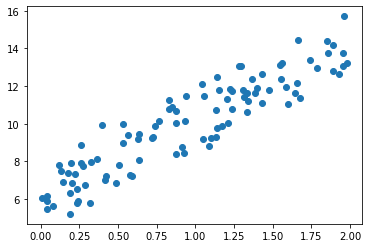

In [14]:
plt.scatter(x,y)

=> 이 점들을 가장 잘 설명하는 직선을 찾아주는 과정이 이어짐

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)  # fit_intercept[default = Ture] : 절편 값을 계산할지 말지

lr = model.fit(x,y)
print(lr.coef_) # 회귀 계수가 배열 형태로 출력
lr.intercept_  # intercept 값

[[3.96846751]]


array([6.22215108])

In [22]:
x.shape

(100, 1)

----------------

In [23]:
c = 2 * np.random.rand(100)
c

array([0.41494015, 0.84937094, 0.74833996, 0.92715085, 0.55525741,
       1.17356869, 1.72771121, 0.23506371, 1.03475821, 0.26413621,
       1.43371936, 0.79211941, 1.13084262, 0.36655967, 0.28969552,
       0.97611256, 0.71122548, 1.88086389, 1.53065051, 1.49732724,
       1.80743948, 0.16684487, 1.10438494, 1.16895214, 1.92387276,
       0.58429505, 0.48165756, 0.20058788, 0.03285926, 1.85905863,
       1.33983309, 1.57030582, 0.56346021, 1.17282033, 0.12791053,
       0.97125519, 1.95499028, 1.75301049, 0.6763179 , 1.92314031,
       0.46340325, 1.89863764, 1.88275541, 1.59840517, 1.26089587,
       1.74857593, 0.58604057, 1.69788711, 1.23575338, 0.02647372,
       0.69446704, 0.29628172, 1.96365878, 0.95674061, 0.99478273,
       1.27894503, 0.73716921, 0.27380054, 1.64423547, 0.37969582,
       1.02263797, 0.44863406, 0.19568897, 1.72438303, 1.94583898,
       1.92166932, 1.813111  , 1.54809467, 0.6662903 , 0.16220278,
       0.81448234, 0.46446828, 0.26497527, 0.10685436, 1.45118

In [25]:
c.shape # 1차원

(100,)

In [79]:
d = 6 + 4 * x + np.random.randn(100) # 노이즈 섞어주기
d

array([[10.03651412,  9.01555674,  9.74688963, ..., 10.27440409,
         8.35982356, 12.45500089],
       [11.36752102, 10.34656364, 11.07789653, ..., 11.60541099,
         9.69083046, 13.78600779],
       [10.4681131 ,  9.44715572, 10.17848861, ..., 10.70600307,
         8.79142254, 12.88659987],
       ...,
       [ 5.80686646,  4.78590908,  5.51724197, ...,  6.04475643,
         4.1301759 ,  8.22535323],
       [12.27752632, 11.25656894, 11.98790183, ..., 12.51541629,
        10.60083577, 14.6960131 ],
       [ 5.6835699 ,  4.66261252,  5.39394541, ...,  5.92145987,
         4.00687934,  8.10205667]])

In [34]:
model = LinearRegression(fit_intercept = True)  # fit_intercept[default = Ture] : 절편 값을 계산할지 말지

lr1 = model.fit(c.reshape(-1,1),d)
print(lr1.coef_) # 회귀 계수가 배열 형태로 출력
lr1.intercept_  # intercept 값

[[0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29249318]
 [0.29

array([10.19385824, 10.19706863,  8.77672211,  8.11895553,  7.91938109,
       10.11269886,  8.31346023,  8.99550313,  8.90600545,  9.44975219,
        7.56603968,  9.69109808, 10.02621051,  9.59074157,  9.19143331,
        9.59971965,  9.90136583,  6.72972673, 11.45823179,  9.89241281,
        8.8499109 ,  9.11136611,  9.99606126,  9.38621555,  7.47163502,
       11.56681235,  9.39177883, 10.5224922 ,  8.81026964, 11.03869654,
        9.78866317, 10.11116332,  8.45706612, 10.71346478, 10.19213765,
       10.80416572,  8.87423193,  9.02129237, 11.80623618,  8.44230366,
        9.36636979, 10.63921085,  9.60004445, 10.08527317,  9.10287046,
        9.87237537,  8.19579263, 11.16045017,  9.38415544,  8.82214128,
       10.16870257,  9.0415997 ,  8.16806101,  8.15560198, 10.19609264,
        9.34274605,  9.36861793, 10.58006329,  8.37549368,  8.77164173,
        9.11743968,  9.59667108,  9.46014803,  9.21543229,  9.44069308,
        9.39501421,  8.7827151 ,  8.6893265 ,  9.77683584,  8.61

> reshape(-1,1)의 다른 방법

In [36]:
c[:, np.newaxis]  # np.newaxis = 새로운 축 생성(세로로 세워짐)

array([[0.41494015],
       [0.84937094],
       [0.74833996],
       [0.92715085],
       [0.55525741],
       [1.17356869],
       [1.72771121],
       [0.23506371],
       [1.03475821],
       [0.26413621],
       [1.43371936],
       [0.79211941],
       [1.13084262],
       [0.36655967],
       [0.28969552],
       [0.97611256],
       [0.71122548],
       [1.88086389],
       [1.53065051],
       [1.49732724],
       [1.80743948],
       [0.16684487],
       [1.10438494],
       [1.16895214],
       [1.92387276],
       [0.58429505],
       [0.48165756],
       [0.20058788],
       [0.03285926],
       [1.85905863],
       [1.33983309],
       [1.57030582],
       [0.56346021],
       [1.17282033],
       [0.12791053],
       [0.97125519],
       [1.95499028],
       [1.75301049],
       [0.6763179 ],
       [1.92314031],
       [0.46340325],
       [1.89863764],
       [1.88275541],
       [1.59840517],
       [1.26089587],
       [1.74857593],
       [0.58604057],
       [1.697

### 비용 함수 정의하기

In [86]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [90]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, x, y, learning_rate = 0.01):
    N = len(y)
    
    # 먼저 s1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.dot((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(x.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [96]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(x, y, iters = 1000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [102]:
w1, w0 = gradient_descent_steps(x, y, iters = 10000)
print(np.round(w1[0, 0], 3))
print(np.round(w0[0, 0], 3))

TypeError: dot() missing 1 required positional argument: 'b'

In [101]:
y_pred = w1[0,0] * x + w0

NameError: name 'w1' is not defined

In [103]:
get_cost(y, y_pred)

NameError: name 'y_pred' is not defined

NameError: name 'y_pred' is not defined

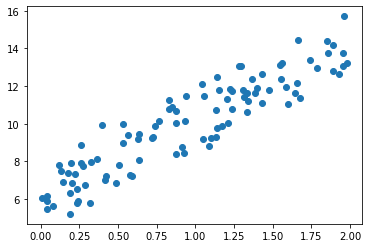

In [104]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## 다중 회귀 분석 - 보스턴 주택 가격

### LinearRegression 클래스 - Ordinary Least Squares

#### 입력 파라미터

> **fit_intercept**[default = True] : intercept 값을 계산할지 말지

#### 속성

> **coef_** : fit() 메서드를 수행했을 때 회귀 계숙 배열 형태로 저장되어 출력  
> **intercept)** : intercept 값

#### 다중 공선성(multi-collinearity) 문제

 : <span style="color: #2D3748; background-color:#fff5b1;">피처 간의 상관관계가 매우 높은 경우(영향이 너무 큰 경우)</span>에는 오히려 <span style="color: #2D3748; background-color:#fff5b1;">오류</span>를 <span style="color: #2D3748; background-color:#fff5b1;">발생</span>시킬 수 있음

> 해결 방법 : 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용 또는 PCA를 통해 차원 축소를 수행

### 회귀 지표 평가

#### MAE(Mean Absolute Error)

실제 값과 예측값의 차이를 <span style="color: red">**절댓값**</span>으로 변화해 평균한 것  
  
<span style="color: #2D3748; background-color:#fff5b1;">$\frac{1}{n} \sum_{i=1}^n \vert Y_{i} - \hat Y_{i} \vert$ </span>

#### MSE(Mean Squared Error)

실제 값과 예측값의 차이를 <span style="color: red">**제곱**</span>해 평균한 것  
  
$\frac{1}{n} \sum_{i=1}^n ( Y_{i} - \hat Y_{i} )^2$

#### RMSE(Root Mean Squared Error)

MSE에 루트 씌운 것  
  
  $\sqrt {\frac{1}{n} \sum_{i=1}^n ( Y_{i} - \hat Y_{i} )^2}$

> RMSE 가 가장 많이 사용되지만 사이킷런에는 아쉽게도 없음 -> MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어 사용함


|평가방법 |사이킷런 평가 지표 API                                                      |scoring 함수 적용 값      |
|--------|--------------------------------------------------------------------------|---------------------------|
|**RMSE** |metrics.mean_squared_error를 그래도 사용하되 **squared** 파라미터를 **False**로 설정|neg_root_mean_squared_error|



### 구현하기

> **Feature 설명**

> CRIM: 지역별 범죄 발생률  
ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
INDUS: 비상업 지역 넓이 비율  
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX: 일산화질소 농도  
RM: 거주할 수 있는 방 개수  
AGE: 1940년 이전에 건축된 소유 주택의 비율  
DIS: 5개 주요 고용센터까지의 가중 거리  
RAD: 고속도로 접근 용이도  
TAX: 10,000달러당 재산세율  
PTRATIO: 지역의 교사와 학생 수 비율  
B: 지역의 흑인 거주 비율  
LSTAT: 하위 계층의 비율  
MEDV: 본인 소유의 주택 가격(중앙값)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
# 데이터 로드
boston = load_boston()

In [42]:
# DataFrame 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [44]:
# target 배열은 주택 가격임. 이를 price 컬럼으로 추가
boston_df['PRICE'] = boston_df.iloc[:, -1]

In [45]:
boston_df.shape

(506, 14)

In [46]:
boston_df[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,4.03


In [50]:
# 결측치 및 데이터 타입 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


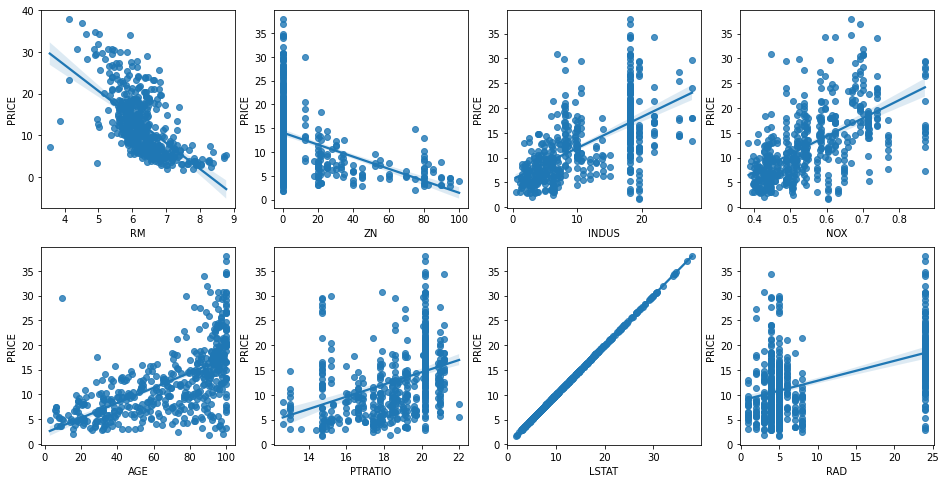

In [56]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4 
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])

#### 선형 회귀 모델

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds =lr.predict(X_test)

mse= mean_squared_error(y_test, y_preds) # MSE 측정
rmse = np.sqrt(mse) # RMSE 측정

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # R2 score 측정

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 0.000, RMSE : 0.000
Variance score : 1.000
절편 값: 6.217248937900877e-14
회귀 계수값: [-0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  1.]


In [59]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 시리즈로 생성 index가 컬럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

LSTAT      1.0
CRIM      -0.0
ZN        -0.0
INDUS     -0.0
CHAS       0.0
NOX        0.0
RM        -0.0
AGE       -0.0
DIS       -0.0
RAD       -0.0
TAX        0.0
PTRATIO   -0.0
B          0.0
dtype: float64

In [61]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0. -0. -0. -0. -0.]
 5 folds 의 개별 RMSE scores :  [0. 0. 0. 0. 0.]
 5 folds 의 평균 RMSE : 0.000 


# 다항회귀

(차수가 높은) 2,3차 방정식과 같은 <span style="color: #2D3748; background-color:#fff5b1;">다항식</span>으로 표현됨  
비선형 회귀가 아닌 <span style="color: #2D3748; background-color:#fff5b1;">선형 회귀</span>임  
단순 선형 회귀 직선형보다 <span style="color: #2D3748; background-color:#fff5b1;">예측 성능 높음</span>

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

#3차 다항식 만들기
def polynomial_func(X):
    y = 1 + 2*X[: , 0] + 3*X[: , 0]**2 + 4*X[: , 1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [65]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [66]:
model.named_steps['linear'].coef_

array([0.        , 0.18018018, 0.18018018, 0.36036036, 0.54054054,
       0.72072072, 0.72072072, 1.08108108, 1.62162162, 2.34234234])

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값ㅇ르 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

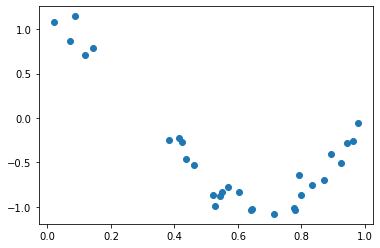

In [71]:
plt.scatter(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [4, 2]

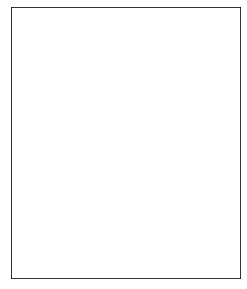

In [67]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0. -0. -0. -0. -0.]
 5 folds 의 개별 RMSE scores :  [0.005 0.007 0.005 0.01  0.009]
 5 folds 의 평균 RMSE : 0.007 


## 로그 변환

## 로지스틱 회귀(Logistic Regression)

### 선형회귀와 다른 점은?

선형 함수의 회귀 최적선을 찾는 것이 아니라 <span style="color: #2D3748; background-color:#fff5b1;">**시그모이드 함수 최적선을 찾고, 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정**</span>함

<p align="center"><img src="./sigmoid.png"></p>

>  $y = \frac{1}{1+e^{-z}} = \frac {e^z}{1+e^z}$
- 입력값의 범위는 [ $-\infty $, $\infty$ ], 출력값의 범위는 [0, 1]
- x = 0 일 때, y = 0.5

### 주요 하이퍼 파라미터

> **C** : 규제 강도를 조절하는 alpha 값의 역수 / C 값이 작을수록 규제 강도 큼

> **penalty**[default = 'l2'] : 규제 유형을 설정 / l2 - L2 규제, l1 - L1 규제

> **max_iter** : solver 로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 회수

## 랜덤포레스트 회귀 트리 이용한 보스턴 주택 가격 예측

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [8]:
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1)

In [9]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 100)

In [13]:
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [14]:
np.round(neg_mse_scores, 2) # Negative MSE scores

array([ -8.04, -13.58, -18.16, -47.62, -20.45])

# 회귀 실습 - 자전거 대여 수요 예측

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

In [42]:
bike_df = pd.read_csv('./data/bike/train.csv')
bike_df[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [43]:
bike_df.shape

(10886, 12)

In [44]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


"object형 1개임"을 알 수 있음  

> 문자열을 datetime 타입으로 변경

In [45]:
bike_df['datetime'] = bike_df['datetime'].astype('datetime64')

In [30]:
# pd.to_datetime(df['datetime'])

> datetime 타입에서 년, 월, 일, 시간 추출

In [46]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

In [47]:
bike_df[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [48]:
# bike_df['datetime'] = bike_df['datetime'].astype('str')
# bike_df['year'] = bike_df['datetime'].str.slice(0,4)

In [49]:
# bike_df['datetime'].dt.strftime('%Y')

In [50]:
# bike_df['datetime'].map(lambda x : x.strftime('%Y'))

In [51]:
# bike_df.datetime.dt.year

In [52]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

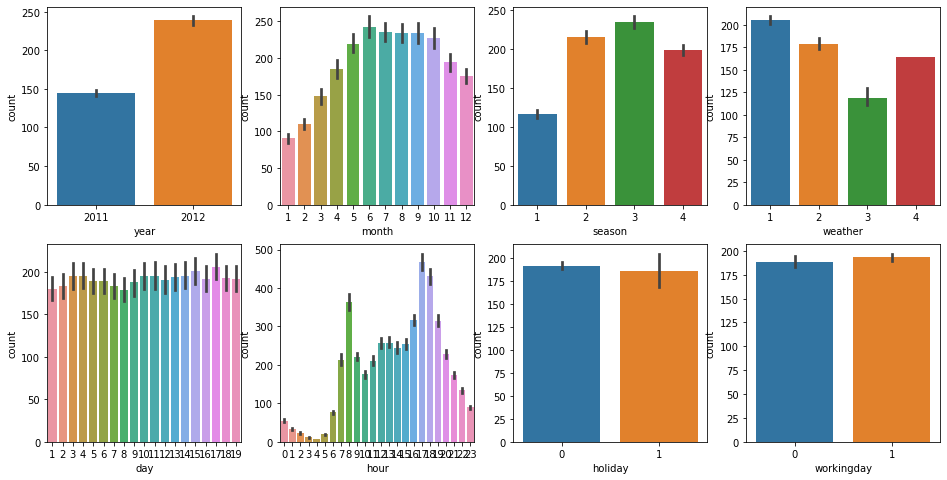

In [57]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 컬럼별로 개별 컬럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

In [59]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [60]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = .3, random_state = 0)

In [62]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [65]:
mse(y_test, pred) # MSE 계산

19852.69408784194

In [69]:
# log1p()를 이용한 RMSLE를 구하는 함수 정의
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [70]:
rmsle(y_test, pred) # log1p()를 이용한 RMSLE 계산

1.1646636237111787

In [71]:
y_test.describe()

count    3266.000000
mean      194.430496
std       180.235458
min         1.000000
25%        43.000000
50%       153.000000
75%       285.750000
max       901.000000
Name: count, dtype: float64

mean 이 194인데 min은 1, max는 901임을 알 수 있음 => 불균형한 데이터? 어느 한 쪽으로 치우쳐져 있음을 알 수 있음

In [73]:
np.log1p(y_test)

6638     5.501258
7975     5.480639
5915     5.438079
8050     6.148468
5894     5.817111
           ...   
5521     1.791759
10626    2.564949
8126     4.317488
1633     4.143135
6198     5.153292
Name: count, Length: 3266, dtype: float64

In [76]:
np.expm1(pred)

array([2.06896132e+139, 1.22825389e+109, 9.40144332e+104, ...,
       8.00398762e+136, 1.02342209e+079, 1.65547294e+072])

# 트리를 이용하여 회귀 분석해보기